In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random

from landscapes.landscapes import Landscape
from landscapes.modules import Node, UnstableNode, Center, NegCenter
from landscapes.landscape_visuals import *
from landscapes.morphogen_regimes import mr_const, mr_sigmoid, mr_piecewise

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Node: x=-1.5; y=0.0; a=1.5; s=1.
Node: x=1.5; y=0.0; a=2.; s=0.8
UnstableNode: x=0.0; y=1.0; a=1.3; s=0.8
Landscape with modules:
Node: x=-1.5; y=0.0; a=1.5; s=1.,
Node: x=1.5; y=0.0; a=2.; s=0.8,
UnstableNode: x=0.0; y=1.0; a=1.3; s=0.8


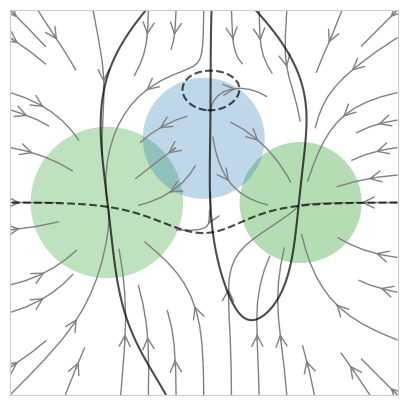

In [2]:
# Landscape with one regime + simple visualization

M1 = Node(x=-1.5, y=0., a=1.5, s=1.)
M2 = Node(x=1.5, y=0., a=2., s=0.8)
M3 = UnstableNode(x=0., y=1., a=1.3, s=0.8)

module_list = [M1, M2, M3]

for M in module_list:
    print(M)

l = Landscape(module_list, A0 = 0.05, regime=mr_const, n_regimes=1)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')


Node: x=-1.5; y=0.0; a=[1.5,2.0]; s=[1.0,0.6]
Node: x=1.5; y=0.0; a=[2.,2.]; s=[0.5,1.2]
UnstableNode: x=0.0; y=1.0; a=[1.3,1.4]; s=[0.8,0.5]
Landscape with modules:
Node: x=-1.5; y=0.0; a=[1.5,2.0]; s=[1.0,0.6],
Node: x=1.5; y=0.0; a=[2.,2.]; s=[0.5,1.2],
UnstableNode: x=0.0; y=1.0; a=[1.3,1.4]; s=[0.8,0.5]


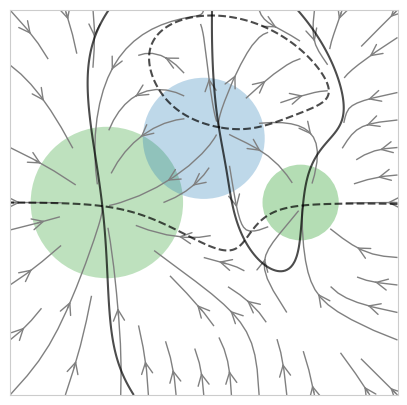

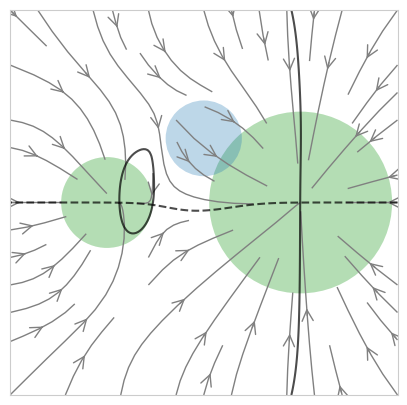

In [3]:
# Landscape with two regimes (piecewise) 

M1 = Node(x=-1.5, y=0., a=(1.5, 2.), s=(1., 0.6))
M2 = Node(x=1.5, y=0., a=(2., 2.), s=(0.5, 1.2))
M3 = UnstableNode(x=0., y=1., a=(1.3, 1.4), s=(0.8, 0.5))

module_list = [M1, M2, M3]

for M in module_list:
    print(M)

l = Landscape(module_list, A0 = 0.005, regime=mr_piecewise, n_regimes=2)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')
fig = visualize_landscape(l, xx, yy, regime=1, color_scheme='fp_types')


Landscape with modules:
Node: x=0.0; y=0.0; a=[1.5,1.5]; s=[2.,2.]; tau=1.0,
UnstableNode: x=0.0; y=0.0; a=[2.,0.]; s=[1.3,1.0]; tau=1.0,
Center: x=0.0; y=0.0; a=[1.,1.]; s=[2.2,2.2]; tau=1.0


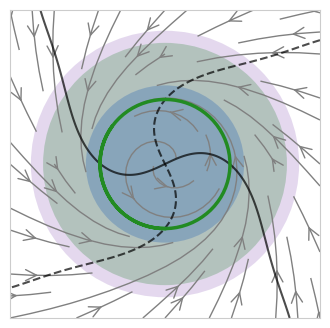

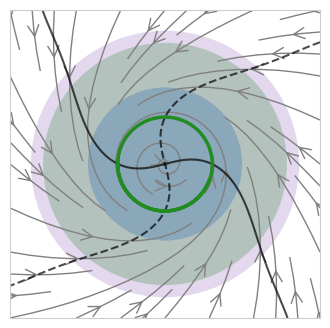

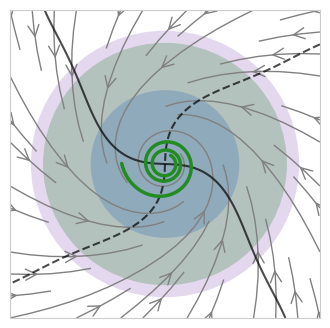

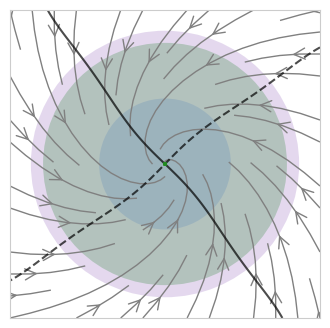

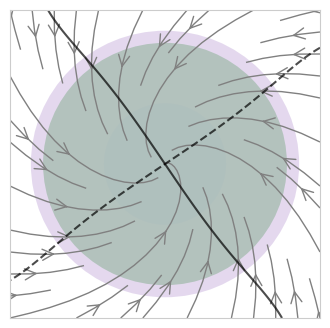

In [4]:
# Landscape with two regimes (sigmoid) + visulization of timepoints with trajectory 
# (Hopf bifurcation)

M1 = Node(0., 0., (1.5, 1.5), (2., 2.), tau=1.)
M2 = UnstableNode(0., 0., (2., 0), (1.3, 1.0), tau=1.)
M3 = Center(0., 0., (1., 1.), (2.2, 2.2), tau=1.)

module_list = [M1, M2, M3]

l = Landscape(module_list, A0 = 0.01, regime=mr_sigmoid, n_regimes=2, morphogen_times=(0.,))
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape_t(l, xx, yy, -5., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, -2., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, -1., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=30)
fig = visualize_landscape_t(l, xx, yy, 1., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, 5., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)



Landscape with modules:
Node: x=-2.5071091355698814; y=-0.9589746781889743; a=[1.00960902,2.61479437,2.03122607]; s=[0.68328198,0.94480410,1.43543542],
Node: x=-0.4337264942983161; y=-2.178134630618503; a=[2.25888640,0.66202984,1.48887312]; s=[1.48611723,1.23261012,1.25061624],
Node: x=-2.8238101863215634; y=-0.497013618082796; a=[1.77871158,1.79545857,2.15891074]; s=[0.63557047,1.44715815,0.58823218],
Node: x=-2.5388650928489502; y=0.7577537384078044; a=[1.59234901,2.39147559,1.79008578]; s=[0.98655230,0.75543982,0.91152789],
Node: x=-0.7174597329958452; y=2.810652215252113; a=[2.42253414,2.42041526,2.12786506]; s=[0.64647669,0.65137882,1.27453859]


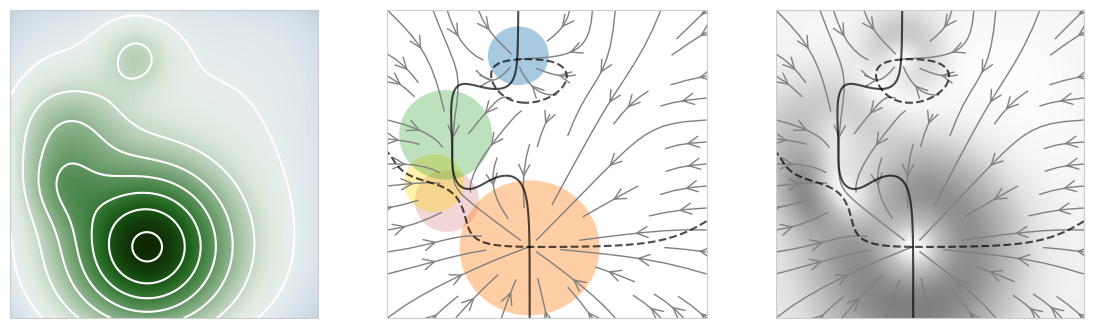

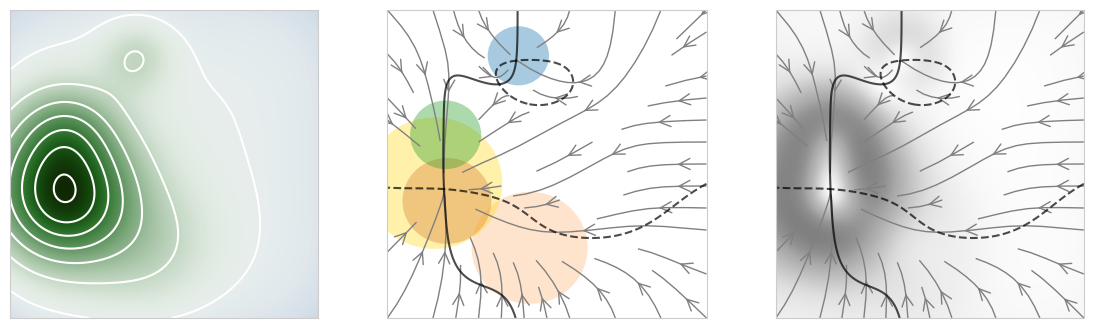

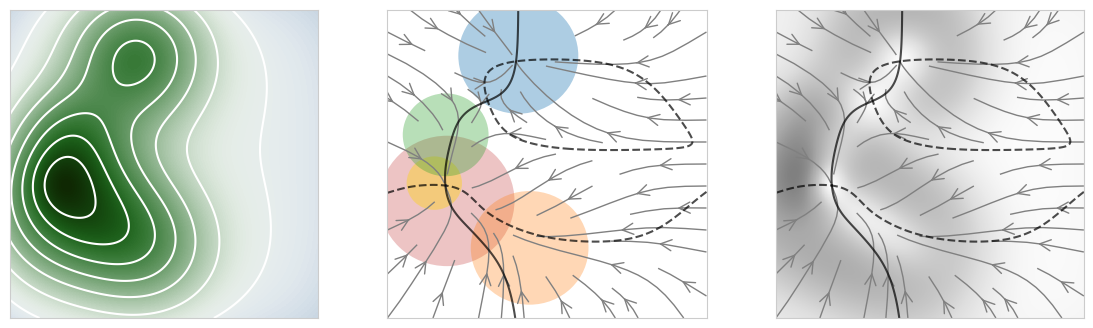

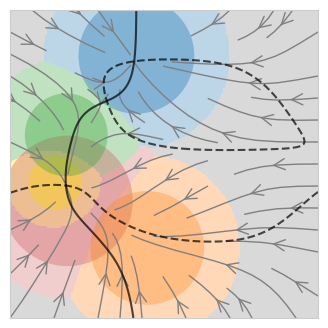

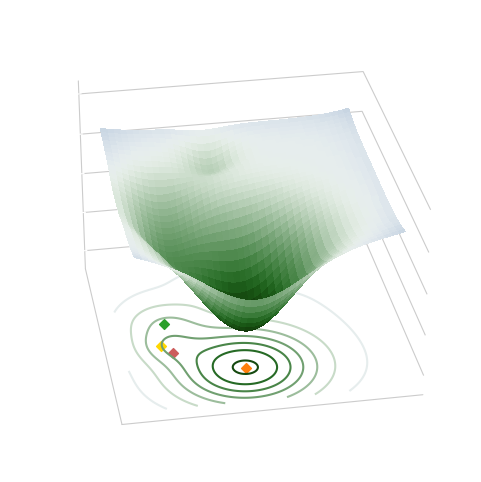

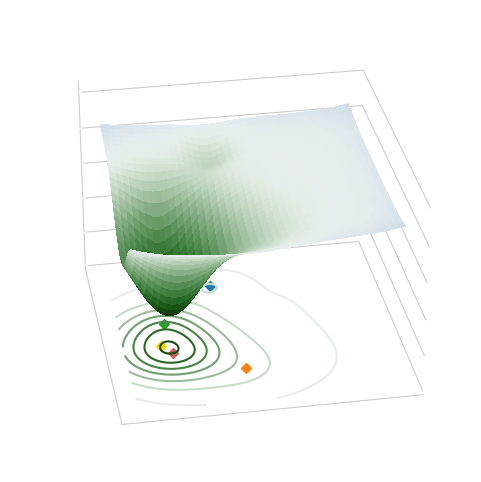

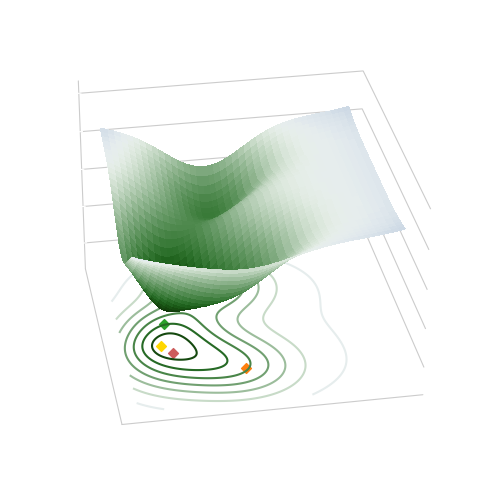

In [47]:
# Random generation of a landscape with node modules (piecewise 3 regimes)
%autoreload
par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5, 3.),
    's': (0.5, 1.5),
}

par_choice_values = {}

used_fp_types = (Node,)
n_modules = 5
start_module_list = [random.choice(used_fp_types).generate(par_limits,par_choice_values,
                                                           immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)
print(landscape)

L = 4.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

figures = visualize_all(landscape, xx,yy,times, color_scheme='order', plot_traj=False)

cell_states = landscape.get_cell_states(6., np.array((xx.flatten(), yy.flatten())), abs_threshold=0.1)
cmap_state = ListedColormap(['grey',]+list(order_colors))
norm_state = BoundaryNorm(np.arange(len(order_colors) + 1) - 1.5, cmap_state.N)
fig = visualize_landscape_t(landscape, xx, yy, 6., color_scheme='order')
# plt.figure()
plt.imshow(np.reshape(cell_states, (npoints, npoints)), cmap=cmap_state, norm=norm_state, origin='lower', extent=(-L, L, -L, L), alpha=0.3,
           interpolation='nearest')
plt.show()

fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='order', cmap_center=0., scatter=True)
fig = visualize_potential(landscape, xx, yy, 1, azim=-100, color_scheme='order', cmap_center=0., scatter=True)
fig = visualize_potential(landscape, xx, yy, 2, azim=-100, color_scheme='order', cmap_center=0., scatter=True)


In [46]:
print(cell_states)

[-1 -1 -1 ... -1 -1 -1]


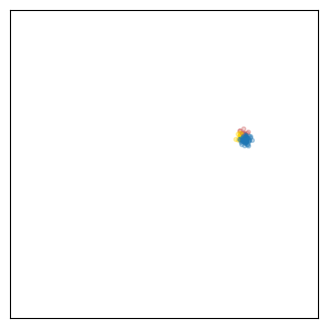

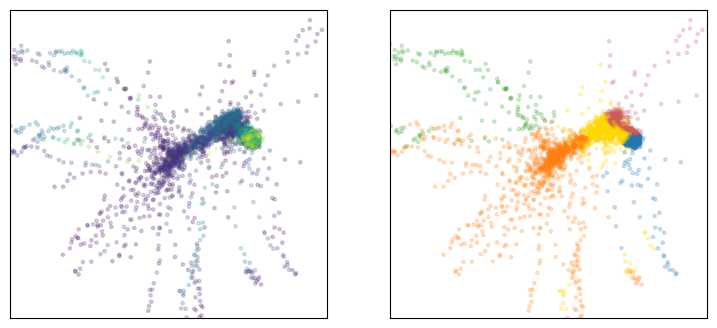

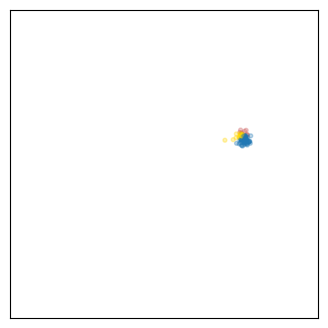

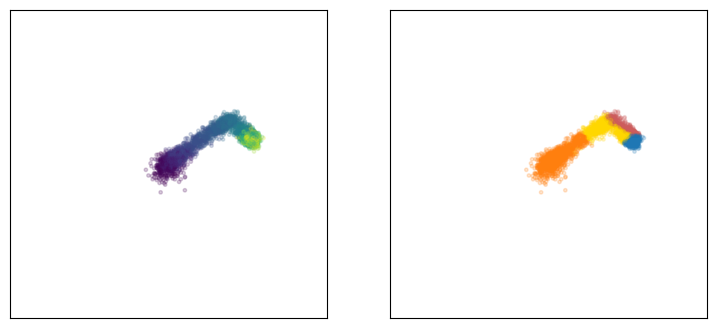

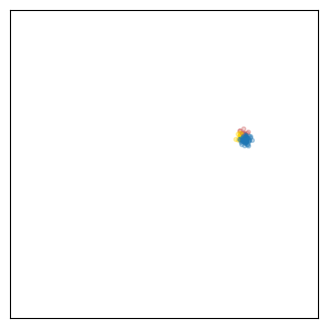

In [3]:
#  Add cells with a scattered initial condition and plot trajectories
n = 100
landscape.init_cells(n, (0., 0.), noise=2.)
get_and_plot_traj(landscape, 0., 10., 51, L, noise=0.2, frozen=False, ndt=50)

# plot final states
plot_cells(landscape, L)

# Cells starting around module i
i = 1
landscape.init_cells(n, i, noise=0.2)
get_and_plot_traj(landscape, 0., 10., 51, L, noise=0.2, frozen=False, ndt=50)

plot_cells(landscape, L)


Landscape with modules:
Center: x=2.9460358148095107, y=-1.8455237996398168, a=[2.50388255,0.86180996,1.47365593], s=[1.1676049 ,1.05882194,1.24137776],
UnstableNode: x=-0.6479873578352655, y=-2.2022619777112107, a=[2.61205648,0.92038361,0.9653782 ], s=[1.10778568,1.16405059,1.09325153],
NegCenter: x=1.0514421978501645, y=-0.13700598562454092, a=[2.29609611,1.14919787,2.68145778], s=[1.46589046,0.99506921,1.00651039],
NegCenter: x=2.484922662608473, y=-1.8741552078503794, a=[2.33533691,2.9927578 ,0.9556512 ], s=[0.81130898,1.26012286,0.59324213],
NegCenter: x=0.7955167106008458, y=1.804387918796376, a=[1.61678181,1.0132941 ,0.62102421], s=[0.75558403,0.57625341,1.23571286],
NegCenter: x=2.5776662860925974, y=0.9907645794887521, a=[0.62259841,2.11532988,1.69264917], s=[0.88320128,1.26844305,0.91350964],
UnstableNode: x=-1.7425210103371447, y=1.371137517366253, a=[2.32515101,2.60064274,2.02185154], s=[0.9563477 ,0.96770879,0.70796089]


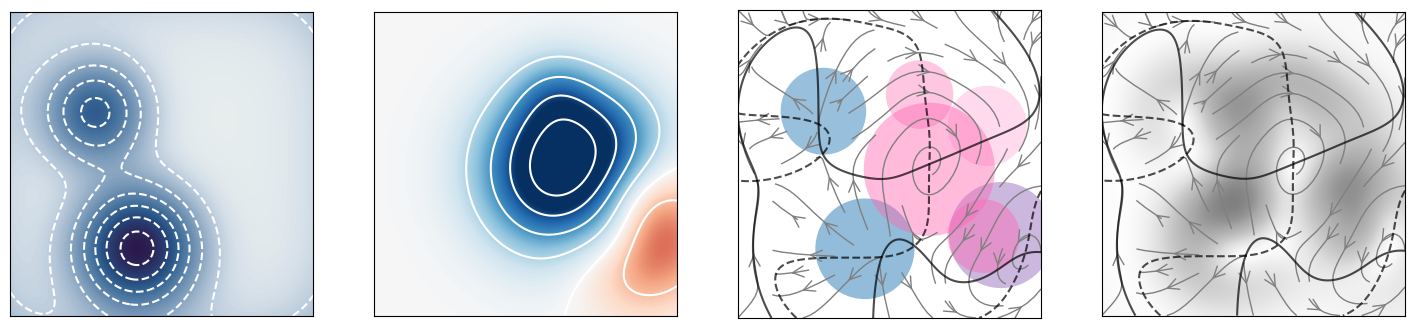

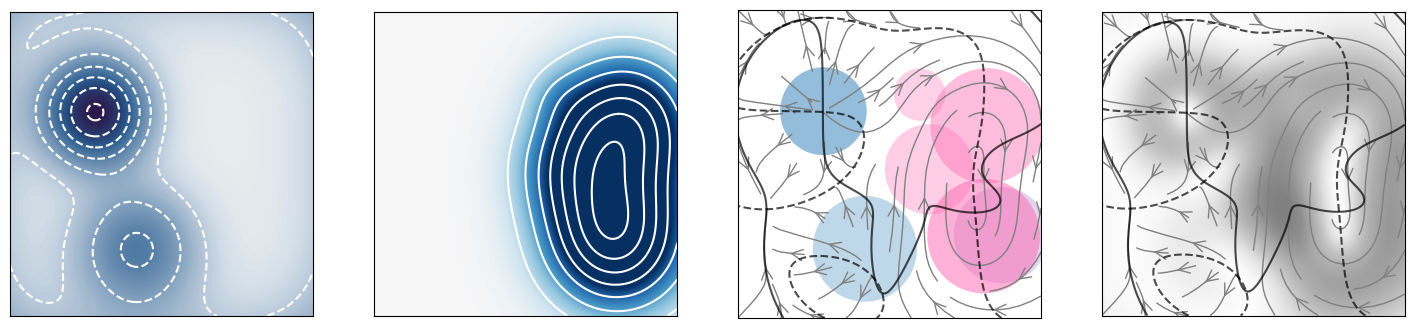

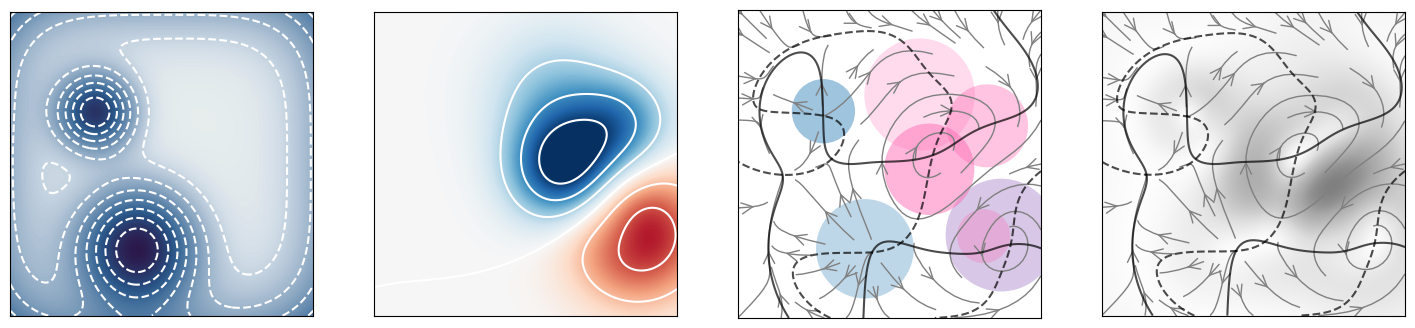

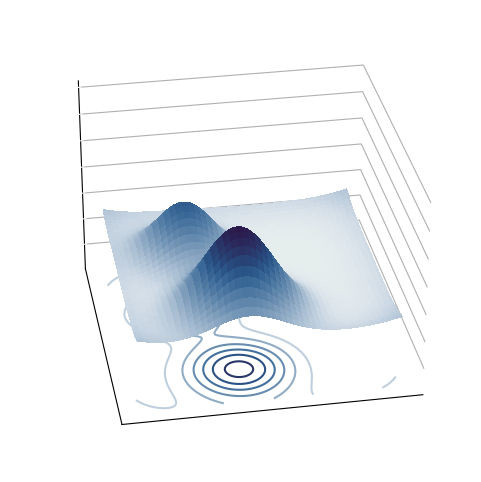

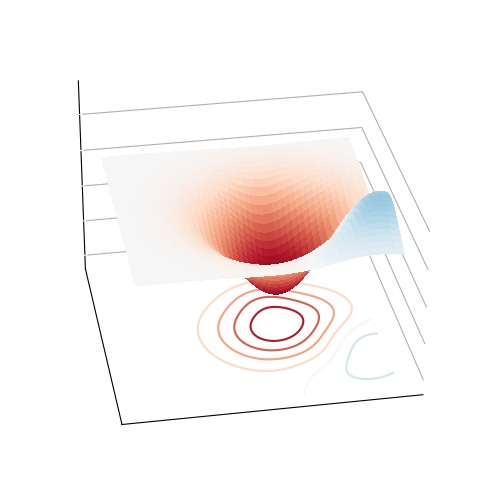

In [5]:
# Random generation of a landscape with gradient and curl modules (piecewise 3 regimes)
par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5, 3.),
    's': (0.5, 1.5),
}

par_choice_values = {}

used_fp_types = (Node, UnstableNode, Center, NegCenter)
n_modules = 7
start_module_list = [random.choice(used_fp_types).generate(par_limits,par_choice_values,
                                                           immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)
print(landscape)

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

figures = visualize_all(landscape, xx,yy,times, color_scheme='fp_types', plot_traj=False)

fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=False)
fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=False, rot=True)
# fig = visualize_potential(landscape, xx, yy, 2, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=True)